In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
%display latex

In [20]:
contour_plot?

Signature:      contour_plot(f, xrange, yrange, **options)
Docstring:     
   "contour_plot" takes a function of two variables, f(x,y) and plots
   contour lines of the function over the specified "xrange" and
   "yrange" as demonstrated below.

   "contour_plot(f, (xmin,xmax), (ymin,ymax), ...)"

   INPUT:

   * "f" -- a function of two variables

   * "(xmin,xmax)" -- 2-tuple, the range of "x" values OR 3-tuple
     "(x,xmin,xmax)"

   * "(ymin,ymax)" -- 2-tuple, the range of "y" values OR 3-tuple
     "(y,ymin,ymax)"

   The following inputs must all be passed in as named parameters:

   * "plot_points"  -- integer (default: 100); number of points to
     plot in each direction of the grid.  For old computers, 25 is
     fine, but should not be used to verify specific intersection
     points.

   * "fill" -- bool (default: "True"), whether to color in the area
     between contour lines

   * "cmap" -- a colormap (default: "'gray'"), the name of a
     predefined colormap, a list o

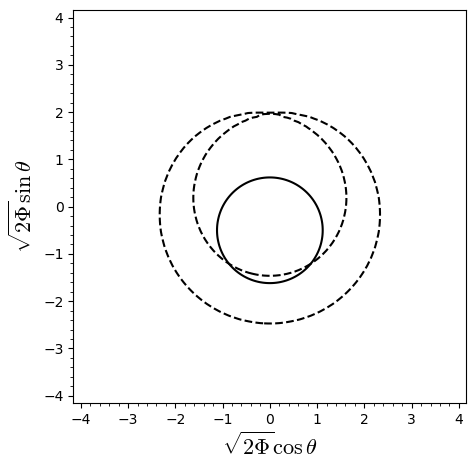

In [50]:
x, y = var("x y")
g = Graphics()
g += contour_plot(
    x**2 + y**2 + 1 * x, (y, -2, 2), (x, -2, 2), fill=False, contours=[1]
)
g += contour_plot(
    (-((x**2 + y**2) ** 2) + 4 * 2 * (x**2 + y**2) - x),
    (y, -4, 4),
    (x, -4, 4),
    fill=False,
    contours=[14],
    linestyles="--",
)
g.axes_labels([r"$\sqrt{2\Phi}\cos\theta$",r"$\sqrt{2\Phi}\sin\theta$"])
g.show()

In [51]:
-(x)-15*(6e-6**(4/3))

1.63540853354893e-6

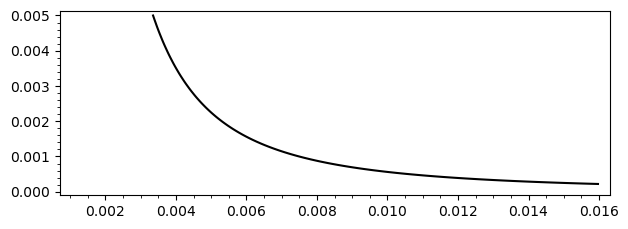

In [82]:
ep, w2, mup = var("e_p omega_2e mu_p")
contour_plot(
    (ep**2 * w2 / (n(3 / 4 * 2 ** (2 / 3) * 3 ** (4 / 3)) * mup ** (4 / 3)))(
        {mup: 6e-6}
    ),
    (ep, 0.001, 0.016),
    (w2, 0, 0.0008 * (2 * pi)),
    aspect_ratio=1,
    fill=False,
    contours=[0.1],
)

In [55]:
Graphics?

Init signature: Graphics()
Docstring:     
   The Graphics object is an empty list of graphics objects. It is
   useful to use this object when initializing a for loop where
   different graphics object will be added to the empty object.

   EXAMPLES:

      sage: G = Graphics(); print(G)
      Graphics object consisting of 0 graphics primitives
      sage: c = circle((1,1), 1)
      sage: G+=c; print(G)
      Graphics object consisting of 1 graphics primitive

   Here we make a graphic of embedded isosceles triangles, coloring
   each one with a different color as we go:

      sage: h=10; c=0.4; p=0.5
      sage: G = Graphics()
      sage: for x in srange(1,h+1):
      ....:     l = [[0,x*sqrt(3)],[-x/2,-x*sqrt(3)/2],[x/2,-x*sqrt(3)/2],[0,x*sqrt(3)]]
      ....:     G+=line(l,color=hue(c + p*(x/h)))
      sage: G.show(figsize=[5,5])

   We can change the scale of the axes in the graphics before
   displaying.:

      sage: G = plot(exp, 1, 10) # long time
      sage: G.show(scale='se

In [2]:
R.<x> = PolynomialRing(RR)

In [3]:
f1 = 2.0252226899385954
f2 = -2.4840051833039407
j = 2

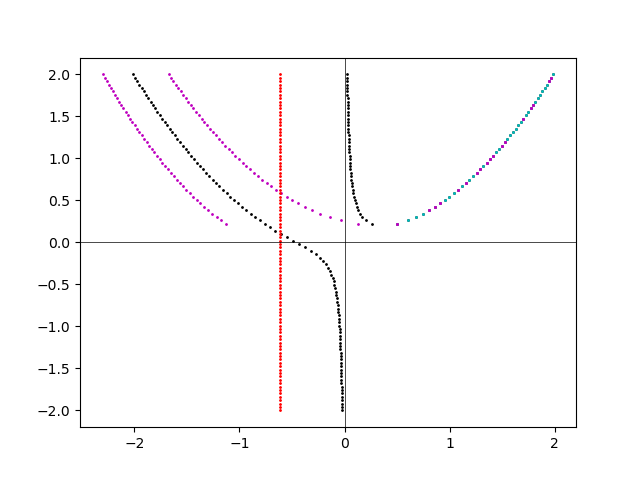

In [33]:
H2 = x**2 - f2/f1*x
plt.clf()
Qcrit = None
for Qval in np.linspace(-2,2,100):
    H1 = -x**4 + 4*Qval*x**2 - n(f1/(3/4*j**(2/3)*(j+1)**(4/3)))*x
    for root in diff(H1,x).roots():
        plt.scatter(root[0],Qval,s=1,c="k")
    if len(diff(H1,x).roots()) > 1:
        if Qcrit is None:
            Qcrit = Qval
        unstable = max([root[0] for root in diff(H1,x).roots()])
        plt.scatter(unstable,Qval,s=1,c="c")
        for root in (H1-H1(unstable)).roots():
            plt.scatter(root[0],Qval,s=1,c="m")

    for root in diff(H2,x).roots():
        plt.scatter(root[0],Qval,s=1,c="r")
plt.axhline(0,c="k",lw="0.5")
plt.axvline(0,c="k",lw="0.5")
plt.show()

In [8]:
a, ep, e, mup = var("a e_p e mu_p")
Qp = (sqrt(a)/j-n(1/(j**(2/3)*(j+1)**(1/3)))+ sqrt(a)*e**2/2 +ep**2*f2**2/2/f1**2)/mup**(2/3)
Qp

1/2*(sqrt(a)*e^2 + 1.504386496825207*e_p^2 + sqrt(a) - 0.873580464736299)/mu_p^(2/3)

In [24]:
(Qp.diff(a)*(-1/Tm-2*e**2/Te) + Qp.diff(e)*(-1/Te)).expand()({Te:1e4,Tm:-1e6,mup:6e-6})(a=0.8)

-0.169300215370307*e^4 - 0.168453714293456*e^2 - 0.270880344592492*e + 0.000846501076851538

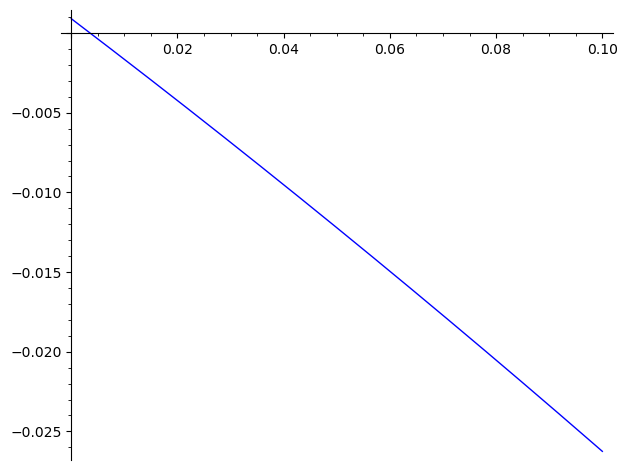

In [26]:
plot((Qp.diff(a)*(-1/Tm-2*e**2/Te) + Qp.diff(e)*(-1/Te)).expand()({Te:1e4,Tm:-1e6,mup:6e-6})(a=0.7), (e,0,0.1))

In [30]:
Qp

1/2*(sqrt(a)*e^2 + 1.504386496825207*e_p^2 + sqrt(a) - 0.873580464736299)/mu_p^(2/3)

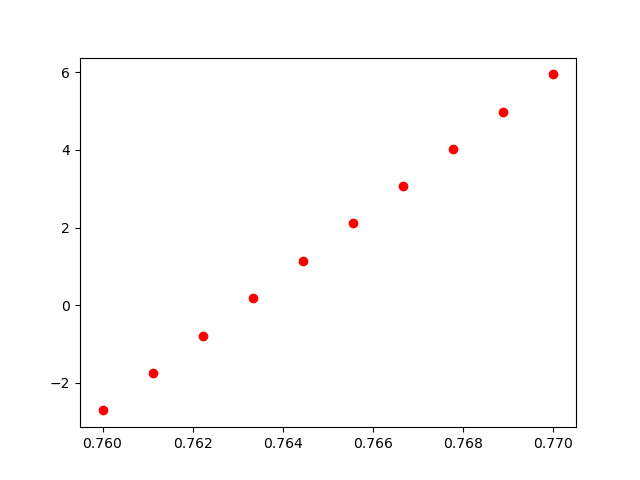

In [42]:
Te, Tm, a0 = var("T_e T_m a_0")
da = var("da", latex_name=r"\delta a")
#(Qp.diff(a)*(-1/Tm-2*e**2/Te) + Qp.diff(e)*(-1/Te)).expand()(a=a0+da).taylor(da,0,1).expand()
Qp.diff(e)
plt.clf()
assume(e,"real")
assume(e>0)
for aval in np.linspace(0.76,0.77,10):
    for root in (Qp.diff(a)*(-1/Tm-2*e**2/Te) + Qp.diff(e)*(-1/Te)).expand()({Te:1e4,Tm:-1e6,mup:6e-6})(a=aval).roots():
        #plt.scatter(aval,root[0],c="k")
        plt.scatter(aval,Qp({mup:6e-6,ep:0.001,a:aval,e:root[0]}),c="r")
plt.show()

In [78]:
taylor?

Signature:      taylor(f, *args)
Docstring:     
   Expands self in a truncated Taylor or Laurent series in the
   variable v around the point a, containing terms through (x - a)^n.
   Functions in more variables are also supported.

   INPUT:

   * "*args" - the following notation is supported

   * "x, a, n" - variable, point, degree

   * "(x, a), (y, b), ..., n" - variables with points, degree of
     polynomial

   EXAMPLES:

      sage: var('x,k,n')
      (x, k, n)
      sage: taylor (sqrt (1 - k^2*sin(x)^2), x, 0, 6)
      -1/720*(45*k^6 - 60*k^4 + 16*k^2)*x^6 - 1/24*(3*k^4 - 4*k^2)*x^4 - 1/2*k^2*x^2 + 1

      sage: taylor ((x + 1)^n, x, 0, 4)
      1/24*(n^4 - 6*n^3 + 11*n^2 - 6*n)*x^4 + 1/6*(n^3 - 3*n^2 + 2*n)*x^3 + 1/2*(n^2 - n)*x^2 + n*x + 1

      sage: taylor ((x + 1)^n, x, 0, 4)
      1/24*(n^4 - 6*n^3 + 11*n^2 - 6*n)*x^4 + 1/6*(n^3 - 3*n^2 + 2*n)*x^3 + 1/2*(n^2 - n)*x^2 + n*x + 1

   Taylor polynomial in two variables:

      sage: x,y=var('x y'); taylor(x*y^3,(x,1),(y,

In [248]:
n(3/4*2**(2./3)*3**(4./3)*(6e-6)**(2./3)/(2*pi))

0.000270705595045005

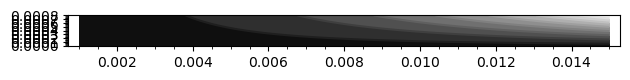

In [244]:
contour_plot(x**2*y-3/4*2**(2/3)*3**(4/3)*(6e-6)**(4/3),(0.001,0.015),(0,0.0008))

In [234]:
H2norm = -1/2*(x**2+y**2) + (-2.4840051833039407 / 2.0252226899385954)*x

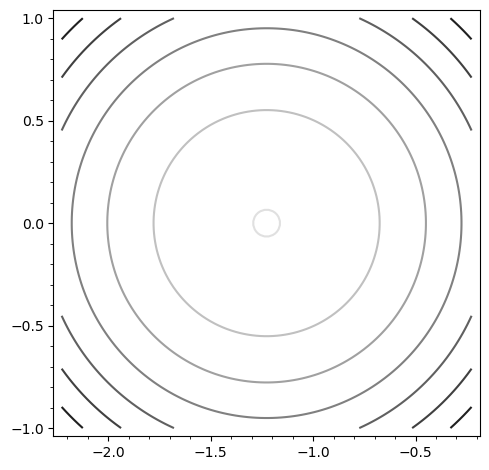

In [239]:
contour_plot(H2norm,(x,(-2.4840051833039407 / 2.0252226899385954)-1,(-2.4840051833039407 / 2.0252226899385954)+1),(y,-1,1),fill=False)

In [90]:
H = (
    n(-3 / 8 * 2 ** (2 / 3) * 3 ** (4 / 3)) * x**4
    + n(3 / 2 * 2 ** (2 / 3) * 3 ** (4 / 3) * 2) * x**2
    + 2.0252226899385954 * x
)
H

-2.57560704574500*x^4 + 20.6048563659600*x^2 + 2.02522268993860*x

In [91]:
sol = (
    x**4
    - 4 * 2 * x**2
    - n(8 / 3 * 2.0252226899385954 / 2 ** (2 / 3) / 3 ** (4 / 3)) * x
    + n(8 / 3 * 2.0252226899385954 / 2 ** (2 / 3) / 3 ** (4 / 3) * H(-1.99))
)
sol

x^4 - 8.00000000000000*x^2 - 0.786308879409358*x + 29.2313622023217

In [240]:
(6e-6)**(1./3)

0.0181712059283214

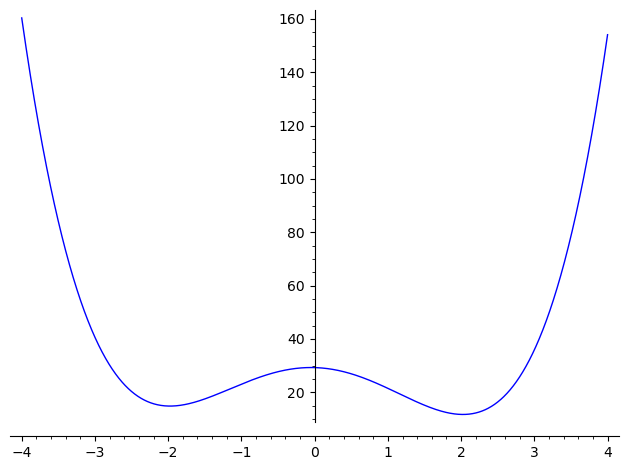

In [92]:
plot(sol,-4,4)

In [54]:
(x**3 - 2*-3*x - n(2/3*2.0252226899385954/2**(2/3)*3**(4/3))).roots()

[(0.580707781621635, 1)]

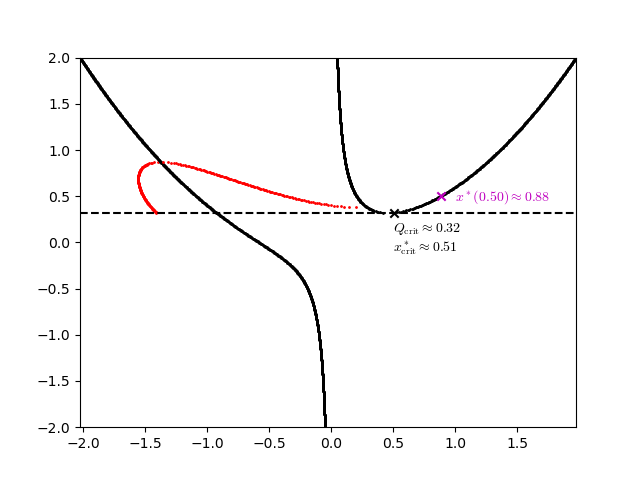

In [225]:
plt.clf()
minr = 0
maxr = 0
Qcrit, xcrit = None, None
Qcalc, xcalc = 0.5, None
for Qval in np.linspace(-2, 2, 1000):
    roots = (
        x**3
        - 2 * Qval * x
        + n(2 / 3 * 2.0252226899385954 / 2 ** (2 / 3) / 3 ** (4 / 3))
    ).roots()
    if (len(roots) > 1) and (Qcrit is None):
        Qcrit = Qval
        xcrit = max([root[0] for root in roots])
    if (xcalc is None) and (Qval > Qcalc):
        xcalc = max([root[0] for root in roots])
    for root in roots:
        if root[0] < minr:
            minr = root[0]
        if root[0] > maxr:
            maxr = root[0]
        plt.scatter(root[0], Qval, c="k", s=1)
    if len(roots) > 1:
        xstar = max([root[0] for root in roots])
        H = (
            n(-3 / 8 * 2 ** (2 / 3) * 3 ** (4 / 3)) * x**4
            + n(3 / 2 * 2 ** (2 / 3) * 3 ** (4 / 3) * Qval) * x**2
            - 2.0252226899385954 * x
        )
        sols = (
            x**4
            - 4 * Qval * x**2
            + n(8 / 3 * 2.0252226899385954 / 2 ** (2 / 3) / 3 ** (4 / 3)) * x
            + n(8 / 3 * 2.0252226899385954 / 2 ** (2 / 3) / 3 ** (4 / 3) * H(xstar))
        ).roots()
        for sol in sorted([s[0] for s in sols])[:2]:
            if sol < xcrit:
                plt.scatter(
                    sol,
                    Qval,
                    c="r",
                    s=1
                )
plt.xlim((minr, maxr))
plt.ylim(-2, 2)
plt.axhline(y=Qcrit, c="k", ls="--")
plt.text(0.5,  -0.1, r"$Q_{\mathrm{crit}}\approx" + f"{Qcrit:0.2f}$\n"+r"$x^*_{\mathrm{crit}}\approx" + f"{xcrit:0.2f}$")
plt.scatter(xcrit,Qcrit,marker="x",c="k")
plt.text(
    1., 0.9*Qcalc, r"$x^*(" + f"{Qcalc:0.2f}" + r")\approx" + f"{xcalc:0.2f}$",c="m"
)
plt.scatter(xcalc,Qcalc,marker="x",c="m")
plt.show()

the stuff was wrong from here on bc i used Q=Q'-R but then treated R as a dynamical variable in Hamilton's equations

0.000000000000000

0.382500000000000*x^2 + 1.08630000000000*x + 0.771273000000000

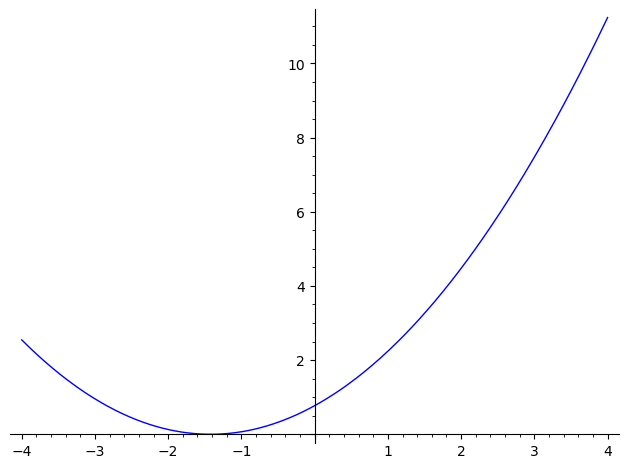

In [224]:
Aval = 0.765
Bval = 1.42
H = (
    Aval/2*x**2 + Aval*Bval*x
)
xstar = -Bval
display(H.diff(x)(xstar))
display(
    H - H(xstar)
)
plot(H - H(xstar),-4,4)

0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


0.500000000000000*x^2 + 0.840000000000000*x + 0.352800000000000

[(-0.840000007336458, 1), (-0.839999992663542, 1)]


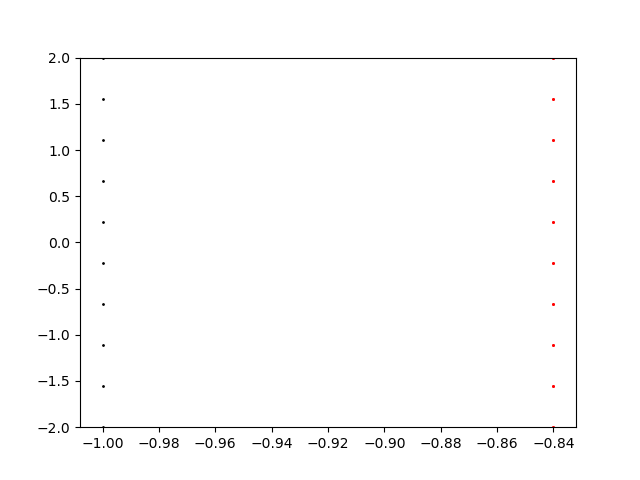

In [213]:
plt.clf()
minr = 0
maxr = 0
Qcrit, xcrit = None, None
Qcalc, xcalc = 0.5, None
Aval = 1
Bval = 0.840
for Qval in np.linspace(-2, 2, 10):
    roots = (
        Aval*x+Aval*Bval
    ).roots()
    plt.scatter(root[0], Qval, c="k", s=1)

    xstar = min([root[0] for root in roots])
    H = (
        Aval/2*x**2 + Aval*Bval*x
    )
    sols = (
        H - H(xstar)
    ).roots()
    display(H-H(xstar))
    print(sols)
    for sol in sorted([s[0] for s in sols]):
    #if sol > xcrit:
        plt.scatter(sol, Qval, c="r", s=1)
plt.ylim(-2, 2)
plt.show()

In [147]:
a, mu, e, ep, f = var("alpha mu_p e e_p f")
Dp = var("Dpom", latex_name=r"\Delta\varpi")
a0 = var("a_0")
da = var("da", latex_name=r"\delta a")
Qp = (
    0.5 * sqrt(a) / mu ** (2 / 3)
    - n(1 / 2 ** (2 / 3) / 3 ** (1 / 3)) / mu ** (2 / 3)
    + sqrt(a) * e**2 / 2 / mu ** (2 / 3)
    + a ** (1 / 4)
    * -2.4840051833039407
    / 2.0252226899385954
    * cos(Dp)
    * e
    * ep
    / mu ** (2 / 3)
    + ep**2 / 2 * (-2.4840051833039407 / 2.0252226899385954) ** 2 / mu ** (2 / 3)
)
Qp = Qp({cos(Dp):0}) # assume Dpom is rapidly rotating
Qp = Qp({e:f*ep}) # assume e equilibrium value is some fraction of e_p
#Qp = Qp({a:a0+da})
Qp

1/2*sqrt(alpha)*e_p^2*f^2/mu_p^(2/3) + 0.7521932484126034*e_p^2/mu_p^(2/3) + 0.500000000000000*sqrt(alpha)/mu_p^(2/3) - 0.436790232368149/mu_p^(2/3)

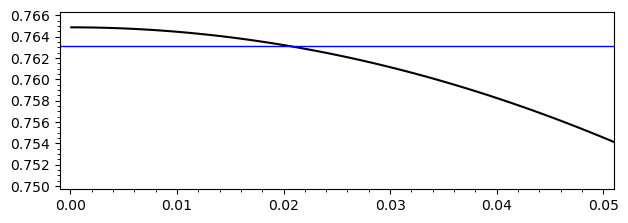

In [182]:
g = Graphics()
g+= contour_plot(
    Qp({f: 1, mu: 6e-5}) - Qcrit,
    (ep, 0, 0.1),
    (a, n(0.9 * (2 / 3) ** (2 / 3)), n(1.1 * (2 / 3) ** (2 / 3))),
    contours=[0],
    fill=False,
)
g+= plot((2/3)**(2/3))
g.xmin(0), g.xmax(0.05) 
g.ymin(0.75), g.ymax(0.766)
g

In [128]:
-(2*-2.4840051833039407/2.0252226899385954*1)


2.453068687848106

In [25]:
A, B, C, H0 = var("A B C H_0")
R, r = var("R r")
expr = A * R**2 + B * R + C * sqrt(R) * cos(r) - H0
expr

A*R^2 + C*sqrt(R)*cos(r) + B*R - H_0

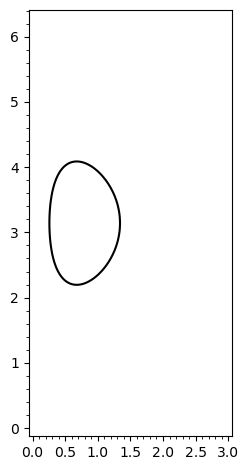

In [72]:
contour_plot(expr({A:-1,B:1,C:-1,H0:0.7}),(R,0,3),(r,0,2*pi),contours=[0],fill=False)

# Preamble

In [2]:
from scipy.special import hyp2f1
def Pochhammer(a, k):
    if k == 0:
        return 1.0
    else:
        return (a + k - 1) * Pochhammer(a, k - 1)


def b(s, j, alpha):
    if j >= 0:  # Eq. 7.87
        return (
            2
            * Pochhammer(s, j)
            / Pochhammer(1, j)
            * (alpha**j)
            * hyp2f1(s, s + j, j + 1, alpha * alpha)
        )
    else:  # Eq. 6.69
        return b(s, -j, alpha)


def Db(s, j, alpha):  # Eq. 6.70
    aux = (
        b(s + 1, j - 1, alpha) - 2 * alpha * b(s + 1, j, alpha) + b(s + 1, j + 1, alpha)
    )
    return s * aux


def D2b(s, j, alpha):  # Eq. 6.71
    aux = (
        Db(s + 1, j - 1, alpha)
        - 2 * alpha * Db(s + 1, j, alpha)
        - 2 * b(s + 1, j, alpha)
        + Db(s + 1, j + 1, alpha)
    )
    return s * aux


def f27lc(alpha, j):
    """
    f27 in MD p543
    (1/2)[−2 j − αD] b^(j)_{1/2}(α) x [e1cos(theta1)]
    """
    return -0.5 * (-2 * (j + 1) * b(0.5, j + 1, alpha) - alpha * Db(0.5, j + 1, alpha))


def f31lc(alpha, j):
    """
    f31 in MD p543
    (1/2)[−1 + 2 j + αD] b^(j-1)_{1/2}(α) x [e2cos(theta2)]
    """
    return -0.5 * ((-1 + 2 * (j + 1)) * b(0.5, j, alpha) + alpha * Db(0.5, j, alpha))

In [3]:
%matplotlib inline
%display latex

# Hamiltonian

In [4]:
Q, R, L, r = var("Q R L r")
j, mu = var("j mu_p")
om1, om2 = var("omega_1 omega_2")
f1, f2 = var("f_1 f_2")

In [5]:
H = -Rational(3/2)*j**Rational(2/3)*(j+1)**Rational(4/3)*R**2 + 3*j**Rational(2/3)*(j+1)**Rational(4/3)*L*R - om1/mu**Rational(2/3)*R-sqrt(2*R)*f1*cos(r)
H

3*L*R*(j + 1)^(4/3)*j^(2/3) - 3/2*R^2*(j + 1)^(4/3)*j^(2/3) - sqrt(2)*sqrt(R)*f_1*cos(r) - R*omega_1/mu_p^(2/3)

In [6]:
Rdot = -H.diff(r)
rdot = H.diff(R)
Rdot

-sqrt(2)*sqrt(R)*f_1*sin(r)

In [7]:
rdot

3*L*(j + 1)^(4/3)*j^(2/3) - 3*R*(j + 1)^(4/3)*j^(2/3) - 1/2*sqrt(2)*f_1*cos(r)/sqrt(R) - omega_1/mu_p^(2/3)

In [9]:
eqn = expand(rdot*R**Rational(1/2)).collect(sqrt(R))({om1:0})
eqn

3*L*sqrt(R)*(j + 1)^(4/3)*j^(2/3) - 3*R^(3/2)*(j + 1)^(4/3)*j^(2/3) - 1/2*sqrt(2)*f_1*cos(r)

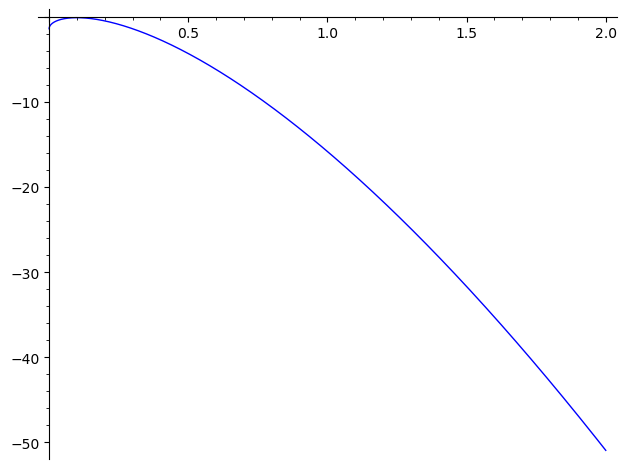

In [22]:
plot(eqn({j:2,f1:2,r:0,L:0.3}),(R,0,2))

In [20]:
Hp = H({L:1,j:2,om1:0,f1:2})
Hp

-9/2*3^(1/3)*2^(2/3)*R^2 + 9*3^(1/3)*2^(2/3)*R - 2*sqrt(2)*sqrt(R)*cos(r)

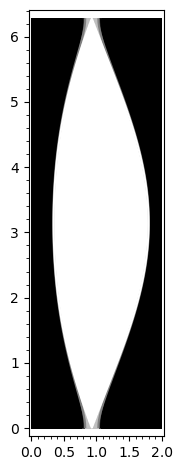

In [65]:
contour_plot(Hp-7.425,(R,0,2),(r,0,2*pi),contours=[-.1,0,.1])

# Solutions at $r=0$

In [7]:
eqn = expand(rdot*R**Rational(1/2)).collect(sqrt(R))({om1:0,r:0})
eqn

3*L*sqrt(R)*(j + 1)^(4/3)*j^(2/3) - 3*R^(3/2)*(j + 1)^(4/3)*j^(2/3) - 1/2*sqrt(2)*f_1

In [8]:
forget()
x = var("x")
assume(x>0)
rts = eqn({R:x**2}).roots(x)

In [16]:
#Lval = 0.316808 # critical value
Lval = 1
print(n(rts[0][0].subs({L:Lval,j:2,f1:2})))
print(n(rts[1][0].subs({L:Lval,j:2,f1:2})))
print(n(rts[2][0].subs({L:Lval,j:2,f1:2})))

0.0689629433966375 - 1.11022302462516e-16*I
-1.03269642065899
0.963733477262352 + 1.11022302462516e-16*I


In [291]:
print(0.0689629433966375**2)
print(0.963733477262352**2)

0.00475588756192783
0.928782215196184


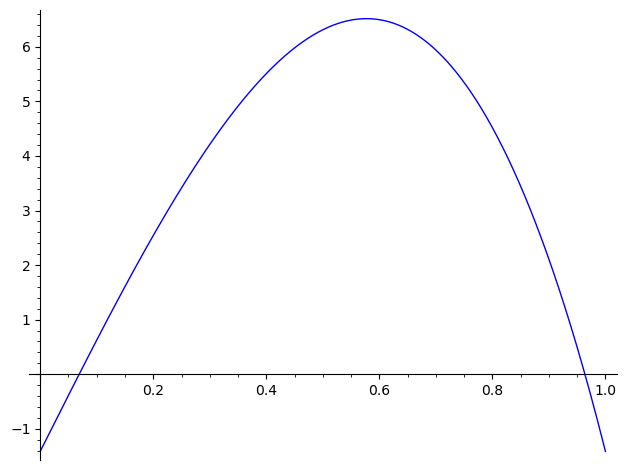

In [292]:
Lval = 1
plot(eqn({R:x**2})({j:2,L:Lval,f1:2}),(x,0,1))

# Solutions at $r=\pi$

In [345]:
eqn = expand(rdot*R**Rational(1/2)).collect(sqrt(R))({om1:0,r:pi})
eqn

3*L*sqrt(R)*(j + 1)^(4/3)*j^(2/3) - 3*R^(3/2)*(j + 1)^(4/3)*j^(2/3) + 1/2*sqrt(2)*f_1

In [346]:
forget()
x = var("x")
assume(x>0)
rts = eqn({R:x**2}).roots(x)

In [347]:
#Lval = 0.316808
Lval = 1
print(n(rts[0][0].subs({L:Lval,j:2,f1:2})))
print(n(rts[1][0].subs({L:Lval,j:2,f1:2})))
print(n(rts[2][0].subs({L:Lval,j:2,f1:2})))

-0.0689629433966377 + 3.33066907387547e-16*I
-0.963733477262352 - 1.66533453693773e-16*I
1.03269642065899 - 5.55111512312578e-17*I


In [348]:
1.03269642065899**2

1.06646189724189

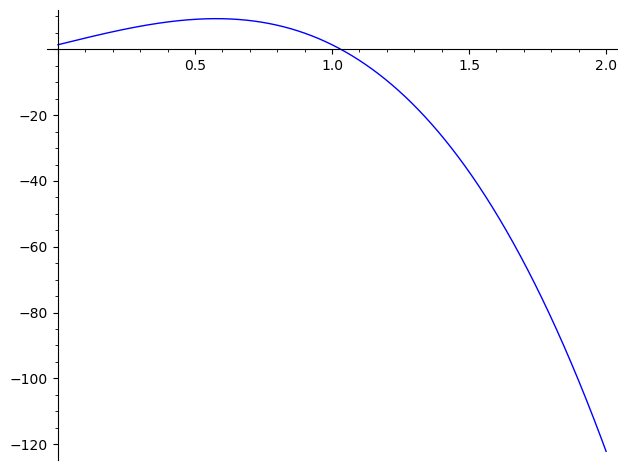

In [349]:
Lval = 1
#Lval = 0.316808 # critical to rdot=0
plot(eqn({R:x**2})({j:2,L:Lval,f1:2}),(x,0,2))

# Value of $H$ at separatrix

In [66]:
Hp = H({L:1,j:2,om1:0,f1:2})
Hp

-9/2*3^(1/3)*2^(2/3)*R^2 + 9*3^(1/3)*2^(2/3)*R - 2*sqrt(2)*sqrt(R)*cos(r)

In [67]:
n(Hp({R:1.03269642065899**2,r:0}))


7.33601389644390

In [68]:
HValSep =  Hp - Hp({R:1.03269642065899**2,r:pi})
HValSep

-9/2*3^(1/3)*2^(2/3)*R^2 + 9*3^(1/3)*2^(2/3)*R - 2*sqrt(2)*sqrt(R)*cos(r) - 4.48012267296754*3^(1/3)*2^(2/3) - 2.06539284131798*sqrt(2)

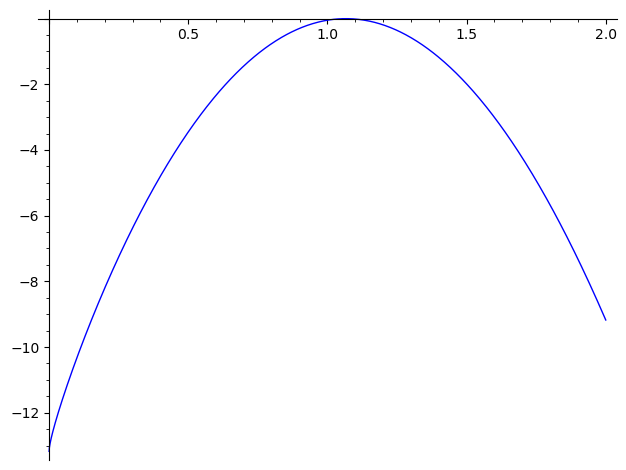

In [69]:
plot(HValSep({r:pi}),R,0,0.,2)

In [232]:
forget()
x = var("x")
assume(x>0)
HSepRoots = HValSep({R:x**2}).roots(x)

In [235]:
HValSep({R:x**2})

-9/2*3^(1/3)*2^(2/3)*x^4 + 4.50000000000000*3^(1/3)*2^(2/3)*x^2 + 2*sqrt(2)*x - 1.08903394557174*3^(1/3)*2^(2/3) - 1.53544852069888*sqrt(2)

In [238]:
print(n(HSepRoots[0][0]))
print(n(HSepRoots[1][0]))
print(n(HSepRoots[2][0])**2)
print(n(HSepRoots[3][0])**2)

-0.767724260349440 - 0.422848767123882*I
-0.767724260349440 + 0.422848767123882*I
0.589400539929094 - 2.35841290412093e-8*I
0.589400539929094 + 2.35841290412093e-8*I


# Width and center as a function of $L$

In [ ]:
# Solution is the unstable point which sets the separatrix value
eqn = expand(rdot*R**Rational(1/2)).collect(sqrt(R))({om1:0,r:pi})
eqn

# work

In [8]:
eqn = expand(rdot*R**Rational(1/2)).collect(sqrt(R))
eqn

-3*R^(3/2)*(j + 1)^(4/3)*j^(2/3) - 1/2*sqrt(2)*f_1*cos(r) + (3*L*(j + 1)^(4/3)*j^(2/3) - omega_1/mu_p^(2/3))*sqrt(R)

In [9]:
A, B, C = var("A B C")
A_expr = eqn.coefficient(R**(3/2))
B_expr = eqn.coefficient(R**(1/2))
C_expr = eqn(R=0)
display(A_expr,B_expr,C_expr)

-3*(j + 1)^(4/3)*j^(2/3)

3*L*(j + 1)^(4/3)*j^(2/3) - omega_1/mu_p^(2/3)

-1/2*sqrt(2)*f_1*cos(r)

In [13]:
rp = A*R**(3/2) + B*R**(1/2) + C
rp

A*R^(3/2) + B*sqrt(R) + C

In [14]:
print(f27lc(((2 / 3) ** (2.0 / 3)), 2), f31lc(((2 / 3) ** (2.0 / 3)), 2))

2.0252226899385954 -2.4840051833039407


In [15]:
rp.subs()

A*R^(3/2) + B*sqrt(R) + C

In [16]:
C_expr({f1:2,r:0})
C_expr({f1:2,r:0})

-sqrt(2)

In [17]:
display(Rdot.diff(r)({r:0,f1:2}))
display(Rdot.diff(r)({r:pi,f1:2}))

-2*sqrt(2)*sqrt(R)

2*sqrt(2)*sqrt(R)

r1p ($r=0$) is the stable solution.  
r2p ($r=pi$) is the unstable solution.

In [72]:
rp1 = rp(
    {
        A: n(A_expr({j: 2})),
        B: B_expr({j: 2, om1: 0}),
        C: n(C_expr({f1: 2, r: 0})),
    }
)
rp2 = rp(
    {
        A: n(A_expr({j: 2})),
        B: B_expr({j: 2, om1: 0}),
        C: n(C_expr({f1: 2, r: pi})),
    }
)

In [73]:
X = PolynomialRing(RealField(), 'x').gen()

In [74]:
assume(x>0)
rp1x = rp1.subs({R: X**2})
rp1x

9.00000000000000*3^(1/3)*2^(2/3)*L*x - 20.6048563659600*x^3 - 1.41421356237310

In [75]:
RR?

Type:           RealField_class
String form:    Real Field with 53 bits of precision
File:           ~/mambaforge/envs/sage/lib/python3.11/site-packages/sage/rings/real_mpfr.pyx
Docstring:     
   An approximation to the field of real numbers using floating point
   numbers with any specified precision. Answers derived from
   calculations in this approximation may differ from what they would
   be if those calculations were performed in the true field of real
   numbers. This is due to the rounding errors inherent to finite
   precision calculations.

   See the documentation for the module "sage.rings.real_mpfr" for
   more details.
Init docstring:
   Initialize "self".

   EXAMPLES:

      sage: RealField()
      Real Field with 53 bits of precision
      sage: RealField(100000)
      Real Field with 100000 bits of precision
      sage: RealField(17,rnd='RNDD')
      Real Field with 17 bits of precision and rounding RNDD
Call docstring:
   This is the generic call method for all par

In [76]:
rp1x.subs(L=0.32).polynomial(RR)

-20.6048563659600*x^3 + 6.59355403710719*x - 1.41421356237310

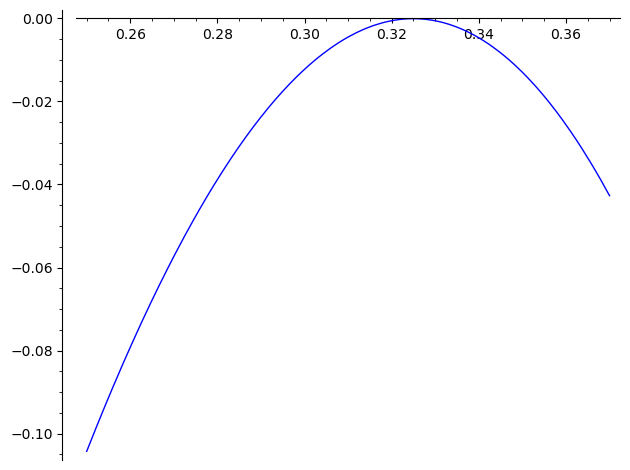

In [232]:
plot(rp1x.subs(L=0.3168),(x,0.25,0.37))

Near $L=0.3168$, number of stable solutions to $\dot r(R)=0$ changes

In [149]:
rp1x1 = rp1x(L=10).polynomial(RR)
rp1x1


-20.6048563659600*x^3 + 206.048563659600*x - 1.41421356237310

In [150]:
rp1x1.roots()


[(-3.16570383817474, 1), (0.00686352867191896, 1), (3.15884030950282, 1)]

$r=0$, $\sqrt R=,$ is the stable solutions.

9.00000000000000*3^(1/3)*2^(2/3)*L*x - 20.6048563659600*x^3 + 1.41421356237310

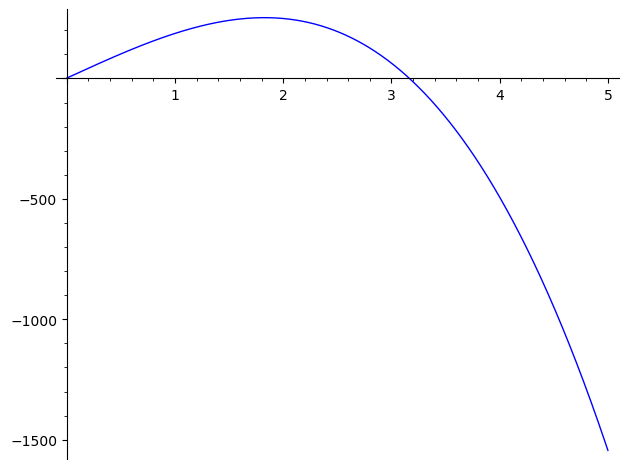

In [153]:
assume(x>0)
rp2x = rp2.subs({R: X**2})
display(rp2x)
plot(rp2x.subs(L=10),(x,0.,5))

In [242]:
rp2x1 = rp2x(L=2).polynomial(RR).roots()
rp2x1

[(-1.39673201460033, 1), (-0.0343377251475900, 1), (1.43106973974792, 1)]

$r=\pi$, $\sqrt{R}=1.032696$ is the unstable point for $L=1$

In [243]:
Hp = H({j:2,L:2,f1:2.0})
print(n(Hp({om1:0,r:pi,R:1.43106973974792**2})))

45.2336913585822


In [244]:
Hp = H({j:2,L:2,f1:2.0})
HsepVal = n(Hp({om1:0,r:pi,R: 1.43106973974792**2}))
HsepVal

45.2336913585822

In [245]:
Hsep = Hp({om1:0})-HsepVal
Hsep

-9/2*3^(1/3)*2^(2/3)*R^2 + 18*3^(1/3)*2^(2/3)*R - 2.00000000000000*sqrt(2)*sqrt(R)*cos(r) - 45.2336913585822

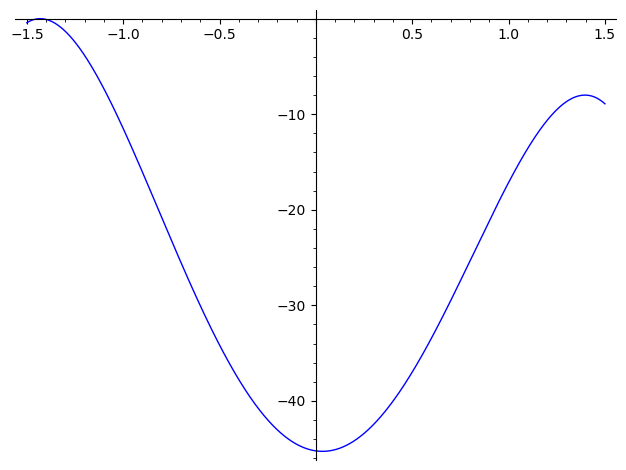

In [246]:
Hsep1 = Hsep({r:0}).subs(R=X**2).polynomial(RR)
Hsep1
plot(Hsep1,-1.5,1.5)

In [209]:
Hsep1.roots()

[]

In [80]:
e, ep, a, tau = var('e e_p a tau')
pom = var("pom", latex_name=r"\varpi")
Phi_expr = sqrt(a)*e**2/2 + a**Rational(0.25)*e*ep*f2*cos(om2*tau-pom)/f1 + ep**2*f2**2/2/f1**2
Phi_expr

a^(1/4)*e*e_p*f_2*cos(omega_2*tau - pom)/f_1 + 1/2*sqrt(a)*e^2 + 1/2*e_p^2*f_2^2/f_1^2